In [1]:
import pandas as pd
df = pd.read_csv('StudentsPerformance.csv')
df.describe()

,math score,reading score,writing score
count,994.000000,994.000000,994.000000
mean,66.081489,69.137827,68.094567
std,15.172668,14.603732,15.182844
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [2]:
df['math score'].fillna(66.081489, inplace = True)
df['reading score'].fillna(69.137827, inplace = True)
df['writing score'].fillna(68.094567, inplace = True)

In [3]:
import numpy as np
maths = np.array(df['math score'])
reading = np.array(df['reading score'])
writing = np.array(df['writing score'])

<AxesSubplot:>

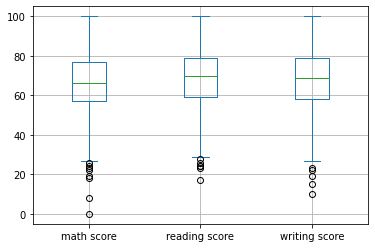

In [4]:
df.plot.box(grid = True)

In [5]:
def inter_quantile(col):
    outliers = []
    filtered = []
    Q3 = np.quantile(col, 0.75)
    Q1 = np.quantile(col, 0.25)
    IQR = Q3 - Q1
    upper_range = Q3 + (1.5 * IQR)
    lower_range = Q1 - (1.5 * IQR)
    for i in col:
        if i > lower_range and i < upper_range:
            filtered.append(i)
        else:
            outliers.append(i)
    return filtered
    print(outliers)

In [6]:
o1 = inter_quantile(df['math score'])
o2 = inter_quantile(df['reading score'])
o3 = inter_quantile(df['writing score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2086cb2970>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2086cb2f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2086cb26a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2086c3f4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2086c3f7c0>],
 'means': []}

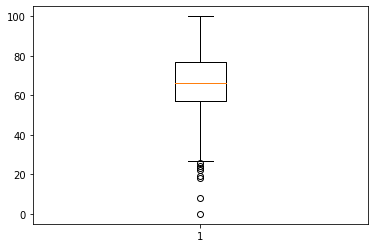

In [7]:
import matplotlib.pyplot as plt
plt.boxplot(df['math score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2086c1e9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2086c1ef40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2086c1e6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2086c30520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2086c307f0>],
 'means': []}

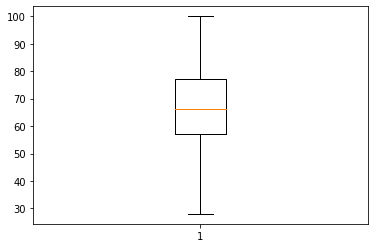

In [8]:
plt.boxplot(o1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2086b8f700>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2086b8fca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2086b8f430>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2086b9c280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2086b9c550>],
 'means': []}

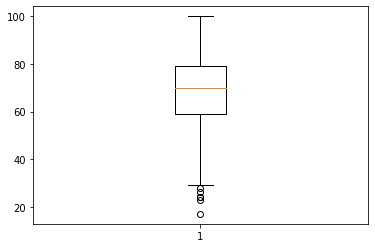

In [9]:
plt.boxplot(df['reading score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2086b65fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2086b75580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2086b65cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2086b75b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2086b75df0>],
 'means': []}

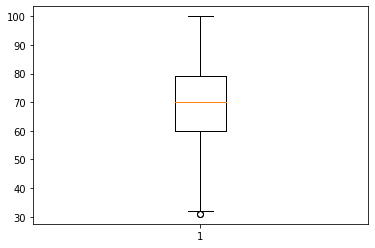

In [10]:
plt.boxplot(o2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2086acdfa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2086adc580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2086acdcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2086adcb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2086adcdf0>],
 'means': []}

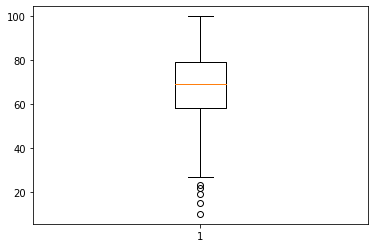

In [11]:
plt.boxplot(df['writing score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2086ab0d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2086a3e2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2086ab0a30>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2086a3e880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2086a3eb50>],
 'means': []}

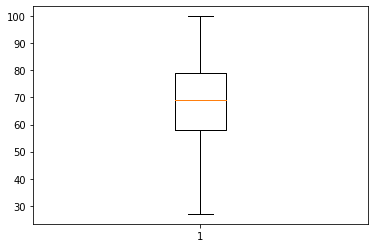

In [12]:
plt.boxplot(o3)

In [13]:
#Z- Score method
from scipy import stats
def z_score(col):
    mean = np.mean(col)
    std = np.std(col)
    threshold = 3
    outlier = []
    op = []
    for i in col:
        z = (i-mean)/std
        z = abs(z)
        if z > threshold:
            outlier.append(i)
        else:
            op.append(i)
    return op
    print('outlier in dataset is', outlier)

In [14]:
o1 = z_score(maths)
o2 = z_score(reading)
o3 = z_score(writing)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f207a590cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f207a5a12b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f207a590a00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f207a5a1850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f207a5a1b20>],
 'means': []}

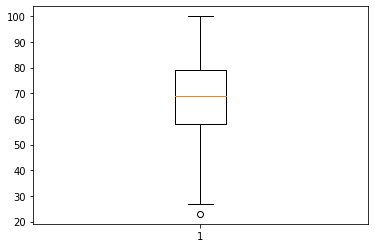

In [15]:
plt.boxplot(o3)